In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [2]:
hotel_booking=pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")

In [3]:
hotel_booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [5]:
hotel_booking.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
hotel_booking.drop("company",axis=1,inplace=True)

In [7]:
print(hotel_booking["agent"].nunique())

333


In [8]:
hotel_booking.drop("agent",axis=1,inplace=True)

In [9]:
pd.crosstab(index=hotel_booking["lead_time"],columns=hotel_booking["is_canceled"],normalize="index")

is_canceled,0,1
lead_time,,
0,0.932230,0.067770
1,0.907225,0.092775
2,0.897052,0.102948
3,0.899780,0.100220
4,0.897376,0.102624
...,...,...
622,0.000000,1.000000
626,0.000000,1.000000
629,0.000000,1.000000


In [10]:
pd.crosstab(index=hotel_booking["arrival_date_year"],columns=hotel_booking["is_canceled"],normalize="index")

is_canceled,0,1
arrival_date_year,,
2015,0.629842,0.370158
2016,0.641367,0.358633
2017,0.613021,0.386979


In [11]:
hotel_booking.drop("arrival_date_year",axis=1,inplace=True)

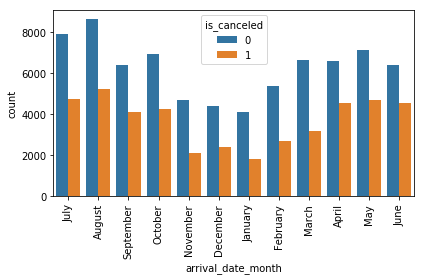

In [12]:
ax = sns.countplot(x="arrival_date_month", data=hotel_booking, hue="is_canceled")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

In [13]:
pd.crosstab(index=[hotel_booking["arrival_date_month"],hotel_booking["arrival_date_week_number"]],columns=hotel_booking["is_canceled"],normalize="index")

is_canceled                                         0         1
arrival_date_month arrival_date_week_number                    
April              13                        0.651515  0.348485
                   14                        0.590320  0.409680
                   15                        0.610636  0.389364
                   16                        0.594179  0.405821
                   17                        0.577897  0.422103
...                                               ...       ...
September          36                        0.601471  0.398529
                   37                        0.606999  0.393001
                   38                        0.609545  0.390455
                   39                        0.617590  0.382410
                   40                        0.599284  0.400716

[70 rows x 2 columns]

In [14]:
hotel_booking.drop("arrival_date_week_number",axis=1,inplace=True)
hotel_booking.drop("arrival_date_day_of_month",axis=1,inplace=True)

In [15]:
pd.crosstab(columns=hotel_booking["hotel"],index=hotel_booking["stays_in_weekend_nights"])

hotel,City Hotel,Resort Hotel
stays_in_weekend_nights,,
0,37817,14181
1,21434,9192
2,19333,13975
3,323,936
4,297,1558
5,44,35
6,40,113
7,6,13
8,24,36


In [16]:
print(sum(hotel_booking["stays_in_weekend_nights"]>4))
hotel_booking.drop(hotel_booking[hotel_booking["stays_in_weekend_nights"]>4].index,inplace=True)

344


In [17]:
pd.crosstab(columns=hotel_booking["hotel"],index=hotel_booking["stays_in_week_nights"])

hotel,City Hotel,Resort Hotel
stays_in_week_nights,,
0,4963,2682
1,21088,9222
2,26403,7281
3,16371,5887
4,6141,3422
5,3266,7811
6,379,1120
7,201,828
8,160,496


In [18]:
print(sum(hotel_booking["stays_in_week_nights"]>10))
hotel_booking.drop(hotel_booking[hotel_booking["stays_in_week_nights"]>10].index,inplace=True)

95


In [19]:
pd.crosstab(columns=hotel_booking["hotel"],index=hotel_booking["adults"])

hotel,City Hotel,Resort Hotel
adults,,
0,380,13
1,15813,7095
2,58177,31203
3,4767,1425
4,31,31
5,0,2
6,0,1
10,0,1
20,0,2


In [20]:
print(sum(hotel_booking["adults"]>4))
hotel_booking.drop(hotel_booking[hotel_booking["adults"]>3].index,inplace=True)

16


In [21]:
pd.crosstab(columns=hotel_booking["hotel"],index=hotel_booking["children"])

hotel,City Hotel,Resort Hotel
children,,
0.0,74039,36262
1.0,3021,1833
2.0,2014,1623
3.0,59,17
10.0,0,1


In [22]:
hotel_booking["children"].replace(np.nan,0,inplace=True)
hotel_booking.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_month                  0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           484
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_status                  0
reservation_

In [23]:
hotel_booking.drop(hotel_booking[hotel_booking["children"]>2].index,inplace=True)

In [24]:
pd.crosstab(columns=hotel_booking["hotel"],index=hotel_booking["babies"])

hotel,City Hotel,Resort Hotel
babies,,
0,78711,39172
1,359,537
2,6,9
9,1,0
10,1,0


In [25]:
print(sum(hotel_booking["babies"]>1))
hotel_booking.drop(hotel_booking[hotel_booking["babies"]>1].index,inplace=True)

17


In [26]:
pd.crosstab(columns=hotel_booking["hotel"],index=hotel_booking["meal"])

hotel,City Hotel,Resort Hotel
meal,,
BB,62101,29810
FB,44,753
HB,6405,7903
SC,10520,80
Undefined,0,1163


In [27]:
mod=hotel_booking["country"].mode()
print(mod)
hotel_booking["country"].replace(np.nan,"PRT",inplace=True)

0    PRT
dtype: object


In [28]:
pd.crosstab(columns=hotel_booking["hotel"],index=hotel_booking["country"])

hotel,City Hotel,Resort Hotel
country,,
ABW,2,0
AGO,280,24
AIA,1,0
ALB,9,3
AND,2,5
...,...,...
VGB,1,0
VNM,6,2
ZAF,61,18


In [29]:
print(hotel_booking["market_segment"].value_counts())

Online TA        56208
Offline TA/TO    24126
Groups           19732
Direct           12478
Corporate         5268
Complementary      740
Aviation           225
Undefined            2
Name: market_segment, dtype: int64


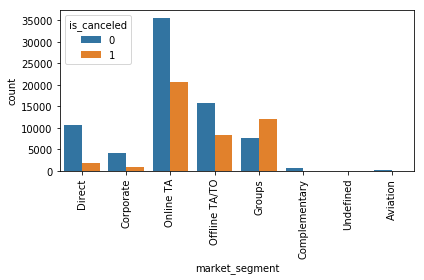

In [30]:
ax=sns.countplot("market_segment",data=hotel_booking,hue="is_canceled")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

In [31]:
value_counts=hotel_booking["market_segment"].value_counts()

to_remove=value_counts[value_counts<=200].index
hotel_booking.replace(to_remove,np.nan,inplace=True)
hotel_booking.dropna(axis=0,how="any",inplace=True)

In [32]:
print(hotel_booking["distribution_channel"].value_counts())

TA/TO        96594
Direct       14238
Corporate     6587
GDS            192
Name: distribution_channel, dtype: int64


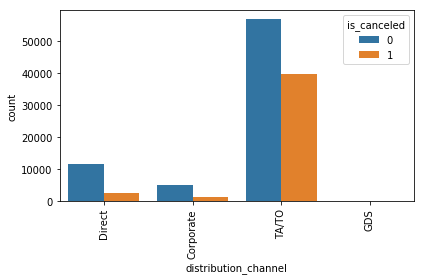

In [33]:
ax=sns.countplot("distribution_channel",data=hotel_booking,hue="is_canceled")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

In [34]:
print(hotel_booking["is_repeated_guest"].value_counts())

0    113847
1      3764
Name: is_repeated_guest, dtype: int64


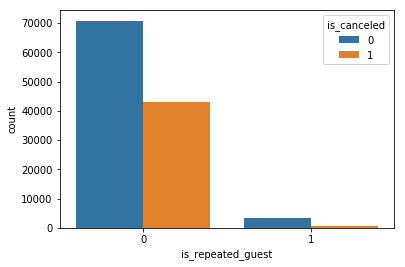

In [35]:
sns.countplot("is_repeated_guest",data=hotel_booking,hue="is_canceled")

In [36]:
print(hotel_booking["previous_cancellations"].value_counts())

0     111210
1       5971
2        114
3         64
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64


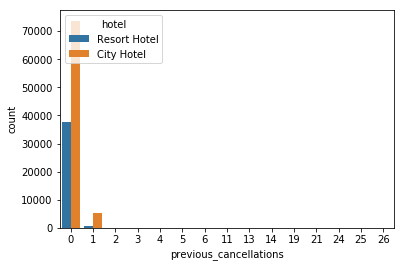

In [37]:
sns.countplot("previous_cancellations",data=hotel_booking,hue="hotel")

In [38]:
pd.crosstab(index="counts",columns=hotel_booking["previous_cancellations"],normalize="index")
print(sum(hotel_booking["previous_cancellations"]>=2))
hotel_booking.drop(hotel_booking[hotel_booking["previous_cancellations"]>=2].index,axis=0,inplace=True)

430


In [39]:
print(hotel_booking["previous_bookings_not_canceled"].value_counts())

0     113838
1       1507
2        560
3        324
4        211
5        168
6        107
7         82
8         64
9         54
10        42
11        34
12        28
13        22
14        21
15        15
16        14
17        10
18        10
19         8
25         8
20         7
21         7
22         6
24         6
27         6
23         5
28         5
26         4
29         4
30         2
31         1
32         1
Name: previous_bookings_not_canceled, dtype: int64


In [40]:
print(hotel_booking["previous_bookings_not_canceled"].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 27 28 29 30 19 26 31 32]


In [41]:
print(sum(hotel_booking["previous_bookings_not_canceled"]>10))

224


In [42]:
hotel_booking.drop(hotel_booking[hotel_booking["previous_bookings_not_canceled"]>10].index,axis=0,inplace=True)

In [43]:
print(hotel_booking["reserved_room_type"].value_counts())

A    84148
D    18995
E     6382
F     2857
G     1991
B     1102
C      894
H      572
P       11
L        5
Name: reserved_room_type, dtype: int64


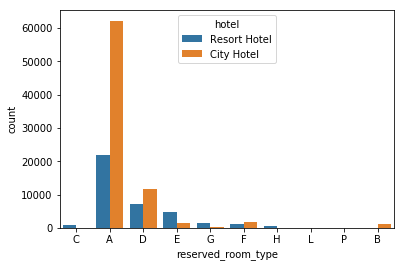

In [44]:
sns.countplot("reserved_room_type",data=hotel_booking,hue="hotel")

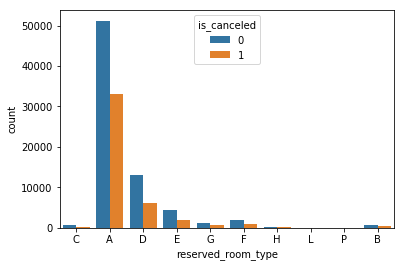

In [45]:
sns.countplot("reserved_room_type",data=hotel_booking,hue="is_canceled")

In [46]:
value_counts=hotel_booking["reserved_room_type"].value_counts()
threshold=100
to_remove=value_counts[value_counts<=threshold].index
hotel_booking["reserved_room_type"].replace(to_remove,np.nan,inplace=True)
hotel_booking.dropna(axis=0,how="any",inplace=True)

In [47]:
print(hotel_booking["assigned_room_type"].value_counts())

A    72533
D    25021
E     7603
F     3679
G     2438
C     2229
B     2138
H      678
I      354
K      268
Name: assigned_room_type, dtype: int64


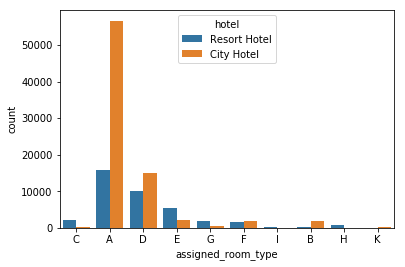

In [48]:
sns.countplot("assigned_room_type",data=hotel_booking,hue="hotel")

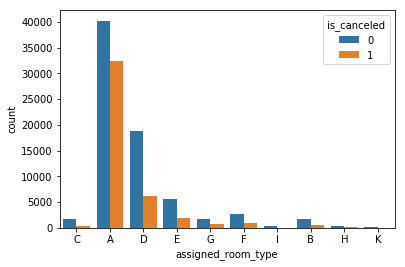

In [49]:
sns.countplot("assigned_room_type",data=hotel_booking,hue="is_canceled")

In [50]:
print(hotel_booking["booking_changes"].value_counts())

0     99490
1     12237
2      3705
3       899
4       364
5       114
6        58
7        28
8        16
9         8
10        5
13        4
14        3
15        3
11        2
16        2
17        1
12        1
18        1
Name: booking_changes, dtype: int64


In [51]:
print(sum(hotel_booking["booking_changes"]>4))

246


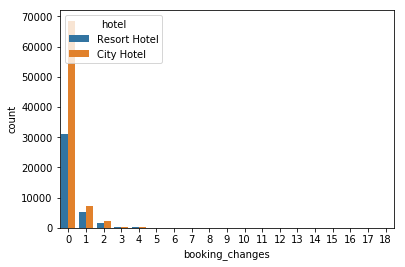

In [52]:
sns.countplot("booking_changes",data=hotel_booking,hue="hotel")

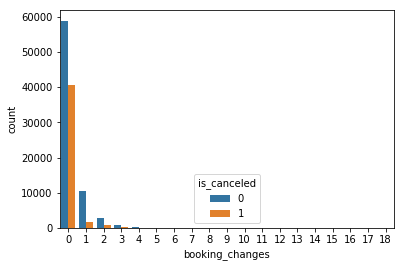

In [53]:
sns.countplot("booking_changes",data=hotel_booking,hue="is_canceled")

In [54]:
hotel_booking.drop(hotel_booking[hotel_booking["booking_changes"]>4].index,axis=0,inplace=True)

In [55]:
print(hotel_booking["deposit_type"].value_counts())

No Deposit    102238
Non Refund     14296
Refundable       161
Name: deposit_type, dtype: int64


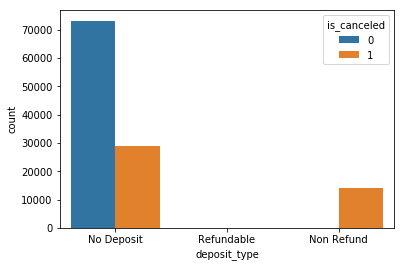

In [56]:
sns.countplot("deposit_type",data=hotel_booking,hue="is_canceled")

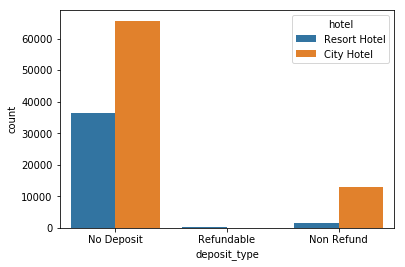

In [57]:
sns.countplot("deposit_type",data=hotel_booking,hue="hotel")

In [58]:
print(hotel_booking["customer_type"].value_counts())

Transient          88043
Transient-Party    24069
Contract            4032
Group                551
Name: customer_type, dtype: int64


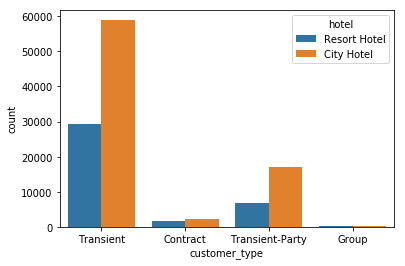

In [59]:
sns.countplot("customer_type",data=hotel_booking,hue="hotel")

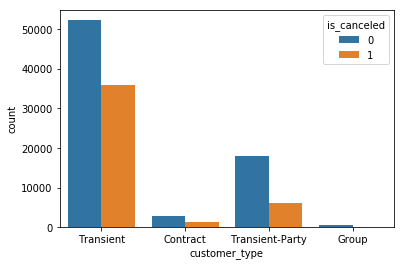

In [60]:
sns.countplot("customer_type",data=hotel_booking,hue="is_canceled")

In [61]:
print(hotel_booking["adr"].value_counts())

62.00     3733
75.00     2692
90.00     2440
65.00     2290
80.00     1855
          ... 
42.67        1
125.09       1
188.78       1
39.69        1
225.33       1
Name: adr, Length: 8699, dtype: int64


In [62]:
print(hotel_booking["required_car_parking_spaces"].value_counts())

0    109473
1      7191
2        26
3         3
8         2
Name: required_car_parking_spaces, dtype: int64


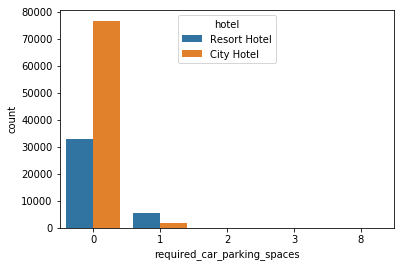

In [63]:
sns.countplot("required_car_parking_spaces",data=hotel_booking,hue="hotel")

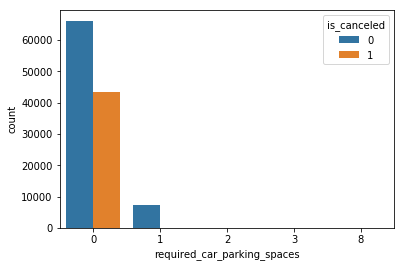

In [64]:
sns.countplot("required_car_parking_spaces",data=hotel_booking,hue="is_canceled")

In [65]:
hotel_booking.drop(hotel_booking[hotel_booking["required_car_parking_spaces"]>1].index,axis=0,inplace=True)

In [66]:
print(hotel_booking["total_of_special_requests"].value_counts())

0    68472
1    32704
2    12717
3     2411
4      323
5       37
Name: total_of_special_requests, dtype: int64


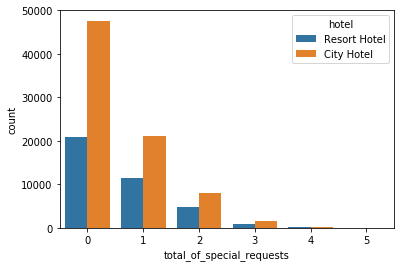

In [67]:
sns.countplot("total_of_special_requests",data=hotel_booking,hue="hotel")

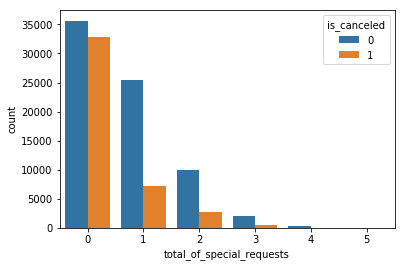

In [68]:
sns.countplot("total_of_special_requests",data=hotel_booking,hue="is_canceled")

In [69]:
pd.crosstab(index=hotel_booking["total_of_special_requests"],columns=hotel_booking["is_canceled"])

is_canceled,0,1
total_of_special_requests,,
0,35618,32854
1,25498,7206
2,9898,2819
3,1981,430
4,290,33
5,35,2


In [70]:
hotel_booking.drop(hotel_booking[hotel_booking["total_of_special_requests"]>4].index,inplace=True)

In [71]:
hotel_booking.drop("reservation_status_date",axis=1,inplace=True)

In [72]:
data1=pd.get_dummies(hotel_booking,drop_first=True)
x=data1.drop("is_canceled",axis=1,inplace=False)
y=data1["is_canceled"].values
x=x.values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
LR=LogisticRegression(solver="lbfgs",max_iter=10000,class_weight="balanced")
fit_model=LR.fit(x_train,y_train)
prediction=LR.predict(x_test)
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))

1.0
[[21905     0]
 [    0 13084]]


In [73]:
prediction1=LR.predict(x)
print(accuracy_score(y,prediction1))
print(confusion_matrix(y,prediction1))

col1=hotel_booking["hotel"].values

data_pred=pd.DataFrame({'hotel':col1,'prediction':prediction1})

1.0
[[73285     0]
 [    0 43342]]


In [74]:
print(data_pred)

               hotel  prediction
0       Resort Hotel           0
1       Resort Hotel           0
2       Resort Hotel           0
3       Resort Hotel           0
4       Resort Hotel           0
...              ...         ...
116622    City Hotel           0
116623    City Hotel           0
116624    City Hotel           0
116625    City Hotel           0
116626    City Hotel           0

[116627 rows x 2 columns]
